# Data Indexing

There are two central steps involved:

1. Documents are stored, prepared and split into smaller text chunks.
2. Text chunks are converted into vector embeddings and stored in a vector database (Vector DB) next to their respective text chunks.


*** 
**Background information**

* All files, chunks and embeddings are stored on a local **Supabase** server (open source Firebase alternative; based on Postgres, which is a relational database management system), see: https://supabase.com/


***
**Coding sources**



## If you facing issues running your Code:

It could be the case that chroma and langchain cause import issues, see: https://github.com/langchain-ai/langchain/issues/7509

In [3]:
## run in your terminal:
# pip install pydantic==1.10.8
# pip install chromadb==0.3.26

## Get API, local supabase server key(s)

In [4]:
import os
import sys

# Assuming 'src' is one level down (in the current directory or a subdirectory)
path_to_src = os.path.join('../..','src')  # Moves one level down to 'src' folder

# Add the path to sys.path
sys.path.append(path_to_src)

# Now you can import your API_key module
import API_key as key

## include self-written functions

In [5]:
import src.forDataIndexing as di

c:\Users\fenn\AppData\Local\R-MINI~1\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [6]:
# Print the current working directory
print("Current working directory:", os.getcwd())

Current working directory: c:\DATEN\PHD\WORKSHOPS\introductory workshop in LLMs\4_summarizingLiterature\RAG


# Connect to our local supabase server

In [7]:
from supabase import create_client

supabase = create_client(key.SUPABASE_URL, key.SUPABASE_KEY)

# Data Preperation: Documents are stored, prepared and split into smaller text chunks

## Enter your search / how you have found the PDF files

In [8]:
res = supabase.table("searches").select("topic").execute()
# Convert the list of tuples to a dictionary
data_dict = dict(res)
# Access the 'data' key directly
data_items = data_dict.get('data', [])
# Extract topics from the list of dictionaries within 'data'
topics = [entry['topic'] for entry in data_items]
print("search topics in your DB:\n", topics)

search topics in your DB:
 ['AI regulation']


In [9]:
entry_search = {'topic': "AI regulation", 'subtopic': "trust, risk, benefit", 
                'search_query':'"artificial intelligence" AND (trust OR risk* OR benef*) AND "regulation"', 'search_plattform': "Google Scholar", 
                'comment':"only retrieved the first 30 entries (2 excluded, because 1x not downloadable); N=29"}

# Check if the 'topic' in entry_search is in topics
if entry_search['topic'] in topics:
    # Update the existing entry where the topic matches
    data = supabase.table('searches').update(entry_search).eq('topic', entry_search['topic']).execute()
    print("search entry updated")
else:
    # Insert the new entry if the topic is not found in topics
    data = supabase.table('searches').insert(entry_search).execute()
    print("new search entry added")

search entry updated


## Upload your PDFs in the local DB

define folder path to your PDFs:

In [10]:
path_to_PDF = os.path.join('PDFs/AIregulation/')  # Moves one level up to 'PDFs' folder

upload PDFs to storage **AND** creates an entry in the DB:

Remark: this function takes a bit, because PDFs are temporarly loaded to get their number of pages

In [11]:
args_Search = {'topic': "AI regulation", 'subtopic': "trust, risk, benefit"}

di.upload_PDFs(folder_path=path_to_PDF, supabase_DB=supabase, args_Search=args_Search, verbose=False)

The following file: "10.1002_sd.2048.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1007_s00146-023-01650-z.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1007_s10506-017-9206-9.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1007_s11077-022-09452-8.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1007_s11569-024-00454-9.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1007_s40804-020-00200-0.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1017_err.2019.8.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1017_err.2021.52.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1017_err.2022.14.pdf" is a) not a PDF or b) was already uploaded in the DB.
The following file: "10.1017_err.2023.1.pdf" is a) not a PDF or b) was 

PDFs in your DB:

In [12]:
res = supabase.storage.from_('files').list()
# Extracting 'name' from each dictionary
file_names = [file['name'] for file in res]

# Output the list of file names
print(file_names)

# Number of PDFs in DB
print(len(file_names))

['10.1002_sd.2048.pdf', '10.1007_s00146-023-01650-z.pdf', '10.1007_s10506-017-9206-9.pdf', '10.1007_s11077-022-09452-8.pdf', '10.1007_s11569-024-00454-9.pdf', '10.1007_s40804-020-00200-0.pdf', '10.1017_err.2019.8.pdf', '10.1017_err.2021.52.pdf', '10.1017_err.2022.14.pdf', '10.1017_err.2023.1.pdf', '10.1080_13600834.2018.1488659.pdf', '10.1080_13669877.2021.1957985.pdf', '10.1111_bioe.13124.pdf', '10.1111_rego.12512.pdf', '10.1111_rego.12563.pdf', '10.1111_rego.12568.pdf', '10.1177_0266382120923962.pdf', '10.1177_2053951719860542.pdf', '10.1177_20539517211039493.pdf', '10.14658_pupj-jelt-2021-2-2.pdf', '10.2139_ssrn.2609777.pdf', '10.2139_ssrn.3501410.pdf', '10.24251_HICSS.2020.647.pdf', '10.24251_HICSS.2021.664.pdf', '10.2979_gls.2023.a886162.pdf', '10.4324_9780429262081-19.pdf', '10.48550_arXiv.2305.02231.pdf', 'doi-10.1017_err.2022.38.pdf', 'white house_AI.pdf']
29


## PDFs in the local DB are prepared

set a folder path for the temporary download of your PDFs:

In [13]:
path_to_PDFs = os.path.join('tmp_downloads')  # Moves one level up to 'tmp_downloads' folder

aaaaaaaaaaaaaaaaaa GROBID

https://grobid.readthedocs.io/en/latest/Grobid-docker/#grobid-and-docker-containers

docker run --rm --gpus all --init --ulimit core=0 -p 8070:8070 grobid/grobid:0.8.1

In [14]:
ERROR

NameError: name 'ERROR' is not defined

see: https://grobid.readthedocs.io/en/latest/Grobid-service/

In [49]:
import requests
from pathlib import Path

pdf_file = Path(path_to_PDFs + "/10.1007_s00146-023-01650-z.pdf")
files = {
    'input': open(pdf_file, 'rb'),
}

response = requests.post('http://localhost:8070/api/processFulltextDocument', files=files)

In [55]:
vars(response)

{'_content': b'<?xml version="1.0" encoding="UTF-8"?>\n<TEI xml:space="preserve" xmlns="http://www.tei-c.org/ns/1.0" \nxmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" \nxsi:schemaLocation="http://www.tei-c.org/ns/1.0 https://raw.githubusercontent.com/kermitt2/grobid/master/grobid-home/schemas/xsd/Grobid.xsd"\n xmlns:xlink="http://www.w3.org/1999/xlink">\n\t<teiHeader xml:lang="en">\n\t\t<fileDesc>\n\t\t\t<titleStmt>\n\t\t\t\t<title level="a" type="main">The regulation of artificial intelligence</title>\n\t\t\t\t<funder ref="#_deMRty9">\n\t\t\t\t\t<orgName type="full">unknown</orgName>\n\t\t\t\t</funder>\n\t\t\t</titleStmt>\n\t\t\t<publicationStmt>\n\t\t\t\t<publisher/>\n\t\t\t\t<availability status="unknown"><licence/></availability>\n\t\t\t\t<date type="published" when="2023-04-03">3 April 2023</date>\n\t\t\t</publicationStmt>\n\t\t\t<sourceDesc>\n\t\t\t\t<biblStruct>\n\t\t\t\t\t<analytic>\n\t\t\t\t\t\t<author role="corresp">\n\t\t\t\t\t\t\t<persName><forename type="first">Giuse

In [54]:
response.content

b'<?xml version="1.0" encoding="UTF-8"?>\n<TEI xml:space="preserve" xmlns="http://www.tei-c.org/ns/1.0" \nxmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" \nxsi:schemaLocation="http://www.tei-c.org/ns/1.0 https://raw.githubusercontent.com/kermitt2/grobid/master/grobid-home/schemas/xsd/Grobid.xsd"\n xmlns:xlink="http://www.w3.org/1999/xlink">\n\t<teiHeader xml:lang="en">\n\t\t<fileDesc>\n\t\t\t<titleStmt>\n\t\t\t\t<title level="a" type="main">The regulation of artificial intelligence</title>\n\t\t\t\t<funder ref="#_deMRty9">\n\t\t\t\t\t<orgName type="full">unknown</orgName>\n\t\t\t\t</funder>\n\t\t\t</titleStmt>\n\t\t\t<publicationStmt>\n\t\t\t\t<publisher/>\n\t\t\t\t<availability status="unknown"><licence/></availability>\n\t\t\t\t<date type="published" when="2023-04-03">3 April 2023</date>\n\t\t\t</publicationStmt>\n\t\t\t<sourceDesc>\n\t\t\t\t<biblStruct>\n\t\t\t\t\t<analytic>\n\t\t\t\t\t\t<author role="corresp">\n\t\t\t\t\t\t\t<persName><forename type="first">Giusella</forename

In [44]:
from grobid_client import Client

client = Client(base_url="https://cloud.science-miner.com/grobid/api")

In [45]:
client

Client(base_url='https://cloud.science-miner.com/grobid/api', cookies={}, headers={}, timeout=5.0, verify_ssl=True)

In [43]:
from grobid_client.grobid_client import GrobidClient

ImportError: cannot import name 'ApiClient' from 'grobid_client.client' (c:\Users\fenn\AppData\Local\R-MINI~1\Lib\site-packages\grobid_client\client.py)

In [33]:
from grobid_client import Client

client = Client(base_url="http://localhost:8070/")

In [46]:
from pathlib import Path
from grobid_client.api.pdf import process_fulltext_document
from grobid_client.models import Article, ProcessForm
from grobid_client.types import TEI, File
pdf_file = "MyPDFFile.pdf"
pdf_file = Path(path_to_PDFs + "/10.1007_s00146-023-01650-z.pdf")

with pdf_file.open("rb") as fin:
    form = ProcessForm(
        segment_sentences="1",
        input_=File(file_name=pdf_file.name, payload=fin, mime_type="application/pdf"),
    )
    r = process_fulltext_document.sync_detailed(client=client, multipart_data=form)
    if r.is_success:
        article: Article = TEI.parse(r.content, figures=False)
        assert article.title

In [47]:
r

Response(status_code=302, content=b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>302 Found</title>\n</head><body>\n<h1>Found</h1>\n<p>The document has moved <a href="https://kermitt2-grobid.hf.space">here</a>.</p>\n<hr>\n<address>Apache/2.4.41 (Ubuntu) Server at cloud.science-miner.com Port 443</address>\n</body></html>\n', headers=Headers({'date': 'Tue, 15 Oct 2024 16:37:04 GMT', 'server': 'Apache/2.4.41 (Ubuntu)', 'location': 'https://kermitt2-grobid.hf.space', 'content-length': '306', 'keep-alive': 'timeout=5, max=100', 'connection': 'Keep-Alive', 'content-type': 'text/html; charset=iso-8859-1'}), parsed=None)

aaaaaaaaaaaaaaaaaa GROBID

get the names of all PDFs, which have not been processed (chunks + embeddings):

In [11]:
non_processed_PDFs = di.non_processed_PDFs(supabase_DB=supabase, verbose=False)
print("non_processed_PDFs:\n", non_processed_PDFs)

ids in your table documents_chunks:
 set()
non_processed_PDFs:
 ['10.1002_sd.2048.pdf', '10.1007_s00146-023-01650-z.pdf', '10.1007_s10506-017-9206-9.pdf', '10.1007_s11077-022-09452-8.pdf', '10.1007_s11569-024-00454-9.pdf', '10.1007_s40804-020-00200-0.pdf', '10.1017_err.2019.8.pdf', '10.1017_err.2021.52.pdf', '10.1017_err.2022.14.pdf', '10.1017_err.2023.1.pdf', '10.1080_13600834.2018.1488659.pdf', '10.1080_13669877.2021.1957985.pdf', '10.1111_bioe.13124.pdf', '10.1111_rego.12512.pdf', '10.1111_rego.12563.pdf', '10.1111_rego.12568.pdf', '10.1177_0266382120923962.pdf', '10.1177_2053951719860542.pdf', '10.1177_20539517211039493.pdf', '10.14658_pupj-jelt-2021-2-2.pdf', '10.2139_ssrn.2609777.pdf', '10.2139_ssrn.3501410.pdf', '10.24251_HICSS.2020.647.pdf', '10.24251_HICSS.2021.664.pdf', '10.2979_gls.2023.a886162.pdf', '10.4324_9780429262081-19.pdf', '10.48550_arXiv.2305.02231.pdf', 'doi-10.1017_err.2022.38.pdf', 'white house_AI.pdf']


In [12]:
args_Split = {'chunk_size': 800, 'chunk_overlap': 150}

di.load_split_embed(supabase_DB=supabase, path_to_PDFs=path_to_PDFs, args_Split=args_Split, LMM='all-MiniLM-L6-v2')
# delete all downloaded files

ids in your table documents_chunks:
 set()


Ignoring wrong pointing object 110 0 (offset 0)
Ignoring wrong pointing object 244 0 (offset 0)


10.1002_sd.2048.pdf


c:\Users\fenn\AppData\Local\R-MINI~1\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


10.1007_s00146-023-01650-z.pdf


In [13]:
response = (
    supabase.table("documents_chunks")
    .select("*")
    .eq("order_chunks", 0)
    .execute()
)

print(len(response.data))
print(response.data)

2
[{'document_id': 'bc3f35f8b1a70f554b49150721f6da14', 'id': '10.1002_sd.2048.pdf', 'order_chunks': 0, 'section': None, 'content': "RESEARCH ARTICLE\nGoverning Artificial Intelligence to benefit the UN Sustainable\nDevelopment Goals\nJon Truby\nLaw & Development, College of Law, Qatar\nUniversity, Doha, Qatar\nCorrespondence\nJon Truby, Centre for Law & Development,\nCollege of Law, Qatar University, PO BOX\n2713 Doha, Qatar.\nEmail: jon.truby@qu.edu.qa\nFunding information\nQatar National Research Fund, Grant/Award\nNumber: NPRP 11S-1119-170016Abstract\nBig Tech's unregulated roll-out out of experimental AI poses risks to the achievement of\nthe UN Sustainable Development Goals (SDGs), w ith particular vulnerability for develop-\ning countries. The goal of financial inclusion is threatened by the imperfect and\nungoverned design and implementation of AI decision-making software making important", 'embedding': '[-0.01656288,0.051273286,-0.012496664,0.058511723,0.027607173,-0.004153954,

# Outcomes

In [14]:
data = supabase.rpc('hello_world3').execute()
print("Hello World:", data)

Hello World: data='hello world 3' count=None


In [18]:
from collections import namedtuple

# Define the namedtuple
Document = namedtuple('Document', ['page_content'])

# Create an instance of Document
doc = Document("How can AI Regulation be defined?")

# Pass the object inside a list
embedding = di.create_embeddings([doc], LMM='all-MiniLM-L6-v2', verbose=False)
print("embedding:\n", embedding)

c:\Users\fenn\AppData\Local\R-MINI~1\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


embedding:
 [[-2.46380940e-02 -2.09062193e-02 -4.28355411e-02 -2.83983499e-02
   7.20837787e-02  1.05383888e-01  4.18924280e-02  8.44032411e-03
   9.05590877e-03  3.86820473e-02 -8.51517729e-03  2.32442878e-02
   1.09736780e-02  1.79275330e-02 -8.89914110e-03  6.53307438e-02
  -9.66010895e-03  8.03544279e-03 -1.25860780e-01 -7.51747265e-02
   1.39706910e-01 -1.75282732e-02 -5.52403890e-02 -2.29305215e-02
  -5.93188293e-02  5.93217798e-02 -3.04225944e-02 -8.29486847e-02
   3.32009718e-02  7.84648769e-03 -9.43987630e-03 -8.64955932e-02
   6.67448491e-02 -4.90483409e-03 -1.43414196e-02  2.00748425e-02
  -3.60700041e-02 -3.71220522e-02  5.73795065e-02 -5.05329110e-03
  -3.10315732e-02 -5.37533648e-02 -5.56663461e-02 -6.31357357e-02
   7.70763755e-02  8.41015205e-02  1.36681171e-02 -3.08732595e-02
  -1.01431169e-01  2.18529943e-02 -4.54328097e-02  1.52817899e-02
   5.35860704e-03 -1.19294459e-02  2.19159499e-02 -5.60815446e-02
   2.04782542e-02 -1.82702336e-02  1.44323520e-02 -1.90469474e-0

In [30]:
match_threshold = 0.7  # Replace with your desired threshold

# Call the RPC function
data = supabase.rpc('match_documents_chunks', {
    'embedding': embedding[0].tolist(),
    'match_threshold': match_threshold,
    'match_count': 22
}).execute()

In [31]:
len(data.data)

3

In [32]:
data.data

[{'document_id': '286c68328e75bb60da600e06c47f98c8',
  'id': '10.1002_sd.2048.pdf',
  'order_chunks': 11,
  'section': None,
  'content': 'of AI can be avoided by pre-empting likely damaging consequences.\nRather then, the purpose of this article is to identify a variety of\nexisting risks to the SDGs and to the future of AI itself, by theevolution of AI within the unregulated existing status quo. It proposes\nthe need for proactive regulatory measures implementing interna-\ntional principles on the governance of AI. This would help ensure AI\noperates to benefit sustainable development. The article argues for\nthe necessity of validating the compliance of AI developers with inter-\nnational principles through continual auditing3to ensure trust in AI\nand avoid potentially damaging outcomes.\n1.3 |Design\nThis article will first introduce the argument that regulation is required',
  'embedding': '[-0.030186802,-0.050413594,0.028719602,-0.015069008,0.068244316,0.024590332,0.039377324,-0

: 

In [ ]:
ERROR

**load_pdfs_by_filename**: Loads and stores PDF pages by filename:

In [9]:



pdf_pages = di.load_pdfs_by_filename(path_to_PDFs, verbose=False)

# Optional: Print the loaded pages by filename
for filename, pages in pdf_pages.items():
    print(f"\nPDF: {filename}")
    print(f"Total Pages: {len(pages)}")
    # print(pages[0])

Ignoring wrong pointing object 110 0 (offset 0)
Ignoring wrong pointing object 244 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 50 0 (offset 0)



PDF: 10.1002_sd.2048.pdf
Total Pages: 14

PDF: 10.1177_20539517211039493.pdf
Total Pages: 5


In [10]:
# Assuming pdf_chunks is the dictionary containing chunks for each PDF
first_key = list(pdf_pages.keys())[0]  # Get the first PDF filename
print("first PDF of folder:", first_key)
first_pdf_pages = pdf_pages[first_key]  # Get the chunks for the first PDF


# Print the first page
print("First Page:", first_pdf_pages[0], "\n\n")

first PDF of folder: 10.1002_sd.2048.pdf
First Page: page_content='RESEARCH ARTICLE
Governing Artificial Intelligence to benefit the UN Sustainable
Development Goals
Jon Truby
Law & Development, College of Law, Qatar
University, Doha, Qatar
Correspondence
Jon Truby, Centre for Law & Development,
College of Law, Qatar University, PO BOX
2713 Doha, Qatar.
Email: jon.truby@qu.edu.qa
Funding information
Qatar National Research Fund, Grant/Award
Number: NPRP 11S-1119-170016Abstract
Big Tech's unregulated roll-out out of experimental AI poses risks to the achievement of
the UN Sustainable Development Goals (SDGs), w ith particular vulnerability for develop-
ing countries. The goal of financial inclusion is threatened by the imperfect and
ungoverned design and implementation of AI decision-making software making important
financial decisions affecting customers. Aut omated decision-makin ga l g o r i t h m sh a v ed i s -
played evidence of bias, lack ethical gover nance, and limit transparen

**split_pdf_pages_into_chunks**: Splits and stores PDF pages into chunks by filename:

On average, one token is roughly 4 characters in English text. So, each chunk of 800 characters roughly corresponds to 200 tokens.


**The maximal number of tokens of `all-MiniLM-L6-v2` is 512.**

In [42]:
pdf_chunks = di.split_pdf_pages_into_chunks(pdf_pages, chunk_size=800, chunk_overlap=150, verbose=False)

# Optional: Print a summary of chunks created per PDF
for filename, chunks in pdf_chunks.items():
    print(f"\nPDF: {filename}")
    print(f"Total Chunks: {len(chunks)}")


PDF: 10.1002_sd.2048.pdf
Total Chunks: 142

PDF: 10.1177_20539517211039493.pdf
Total Chunks: 36


In [43]:
# Assuming pdf_chunks is the dictionary containing chunks for each PDF
first_key = list(pdf_chunks.keys())[0]  # Get the first PDF filename
print("first PDF of folder:", first_key)
first_pdf_chunks = pdf_chunks[first_key]  # Get the chunks for the first PDF

# Access the first and second chunks
first_chunk = first_pdf_chunks[0]
second_chunk = first_pdf_chunks[1]

# Print the first two chunks
print("\nFirst Chunk:", first_chunk, "\n\n")
print("Second Chunk:", second_chunk)

first PDF of folder: 10.1002_sd.2048.pdf

First Chunk: page_content='RESEARCH ARTICLE
Governing Artificial Intelligence to benefit the UN Sustainable
Development Goals
Jon Truby
Law & Development, College of Law, Qatar
University, Doha, Qatar
Correspondence
Jon Truby, Centre for Law & Development,
College of Law, Qatar University, PO BOX
2713 Doha, Qatar.
Email: jon.truby@qu.edu.qa
Funding information
Qatar National Research Fund, Grant/Award
Number: NPRP 11S-1119-170016Abstract
Big Tech's unregulated roll-out out of experimental AI poses risks to the achievement of
the UN Sustainable Development Goals (SDGs), w ith particular vulnerability for develop-
ing countries. The goal of financial inclusion is threatened by the imperfect and
ungoverned design and implementation of AI decision-making software making important' metadata={'source': 'tmp_downloads\\10.1002_sd.2048.pdf', 'page': 0} 


Second Chunk: page_content='ungoverned design and implementation of AI decision-making software ma

In [39]:
print("page content:", first_chunk.page_content, "\n\n")
print("metadata:", first_chunk.metadata)

page content: RESEARCH ARTICLE
Governing Artificial Intelligence to benefit the UN Sustainable
Development Goals
Jon Truby
Law & Development, College of Law, Qatar
University, Doha, Qatar
Correspondence
Jon Truby, Centre for Law & Development,
College of Law, Qatar University, PO BOX
2713 Doha, Qatar.
Email: jon.truby@qu.edu.qa
Funding information
Qatar National Research Fund, Grant/Award
Number: NPRP 11S-1119-170016Abstract
Big Tech's unregulated roll-out out of experimental AI poses risks to the achievement of
the UN Sustainable Development Goals (SDGs), w ith particular vulnerability for develop-
ing countries. The goal of financial inclusion is threatened by the imperfect and
ungoverned design and implementation of AI decision-making software making important 


metadata: {'source': 'tmp_downloads\\10.1002_sd.2048.pdf', 'page': 0}


In [27]:
print(second_chunk.page_content)

ungoverned design and implementation of AI decision-making software making important
financial decisions affecting customers. Aut omated decision-makin ga l g o r i t h m sh a v ed i s -
played evidence of bias, lack ethical gover nance, and limit transparency in the basis for
their decisions, causing unfair outcomes and amplify unequal access to finance. Poverty
reduction and sustainable development targets are risked by Big Tech's potential exploita-
tion of developing countries by using AI to harvest data and profits. Stakeholder progress
toward preventing financial crime and corruptio ni sf u r t h e rt h r e a t e n e db yp o t e n t i a lm i s u s e
of AI. In the light of such risks, Big Tech's unscrupulous history means it cannot be trusted


In [48]:
len(first_pdf_chunks)
first_pdf_chunks[0].page_content

"RESEARCH ARTICLE\nGoverning Artificial Intelligence to benefit the UN Sustainable\nDevelopment Goals\nJon Truby\nLaw & Development, College of Law, Qatar\nUniversity, Doha, Qatar\nCorrespondence\nJon Truby, Centre for Law & Development,\nCollege of Law, Qatar University, PO BOX\n2713 Doha, Qatar.\nEmail: jon.truby@qu.edu.qa\nFunding information\nQatar National Research Fund, Grant/Award\nNumber: NPRP 11S-1119-170016Abstract\nBig Tech's unregulated roll-out out of experimental AI poses risks to the achievement of\nthe UN Sustainable Development Goals (SDGs), w ith particular vulnerability for develop-\ning countries. The goal of financial inclusion is threatened by the imperfect and\nungoverned design and implementation of AI decision-making software making important"

In [29]:
pdf_chunks.keys()

dict_keys(['10.1002_sd.2048.pdf', '10.1177_20539517211039493.pdf'])

In [60]:
list(pdf_chunks.keys())

['10.1002_sd.2048.pdf', '10.1177_20539517211039493.pdf']

In [50]:



# Assuming first_pdf_chunks is an array of PDF page objects or text chunks
tmp_chunks = []  # Initialize an empty array to store the extracted content

# Iterate over each page or chunk in first_pdf_chunks
for chunk in first_pdf_chunks:
    # Extract the page content (assuming 'chunk' has a method or property called 'extract_content')
    content = chunk.page_content  # Modify this line based on how you extract content from your PDF chunks
    # Append the extracted content to tmp_chunks
    tmp_chunks.append(content)

# tmp_chunks now contains the extracted content from each page


In [52]:
len(tmp_chunks)

142

# Data Storage: Text chunks are converted into vector embeddings and stored in a vector database (Vector DB) next to their respective text chunks.

In [56]:
from sentence_transformers import SentenceTransformer
import pandas as pd


# Define sentences
sentences = tmp_chunks

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract features
features = model.encode(sentences)

# Print the features as a pandas dataframe
pd.DataFrame(features)

c:\Users\fenn\AppData\Local\R-MINI~1\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.016563,0.051273,-0.012497,0.058512,0.027607,-0.004154,-0.038968,0.026562,-0.018553,0.061018,...,0.137811,0.037332,0.009077,0.015246,-0.076773,0.013746,0.087771,-0.031443,0.014290,-0.023271
1,-0.041355,0.045621,-0.013860,-0.048444,0.046778,-0.012098,0.022374,0.074269,0.008616,0.080523,...,0.125150,-0.001380,-0.008236,-0.003265,-0.040016,-0.034479,0.130933,-0.033292,0.025915,-0.049217
2,-0.051294,-0.046585,0.031859,-0.029493,0.064127,0.031499,-0.021429,0.014563,-0.044490,0.066641,...,0.090949,0.035067,-0.030642,-0.027889,-0.067893,0.018624,0.091514,0.041004,0.103253,-0.083871
3,0.028908,-0.028161,0.034703,0.035229,0.116294,0.033205,-0.027234,-0.003236,-0.020324,0.047990,...,0.106667,-0.007833,-0.044989,-0.010925,-0.078128,0.015431,0.103369,-0.012695,0.035659,-0.072425
4,-0.026961,-0.000689,0.035866,0.018084,0.100120,-0.011087,-0.064828,0.003811,-0.014539,0.059540,...,0.096148,0.031936,-0.036081,-0.014353,-0.013374,0.087529,0.133024,-0.021458,0.023127,-0.036953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.060885,-0.005557,-0.099088,-0.046170,-0.040899,-0.030712,0.009147,0.059030,0.025159,0.034890,...,0.056038,-0.087262,0.001484,-0.023427,0.012832,0.039440,0.034020,-0.017330,0.030561,-0.020428
138,-0.001169,0.065417,0.020569,0.067359,0.043355,-0.051870,-0.058626,0.007095,-0.012018,0.073373,...,0.025158,-0.026202,0.006009,-0.005664,-0.006105,0.053182,0.048416,0.033996,0.003738,-0.029367
139,-0.048488,-0.035501,-0.054240,-0.077980,0.078824,-0.006271,-0.003856,-0.016471,0.058546,0.045256,...,0.062152,-0.010540,0.112818,-0.016064,-0.071992,0.063626,0.036993,0.033149,-0.019256,-0.078369
140,-0.053643,0.009472,-0.063217,0.044043,0.036618,0.016418,-0.019428,0.019126,0.020338,0.041732,...,0.098380,0.035888,0.017863,-0.038449,-0.074084,0.007135,0.110689,-0.042158,0.035422,-0.010261


In [59]:
len(features)
features[0]

array([-1.65628791e-02,  5.12732863e-02, -1.24966642e-02,  5.85117228e-02,
        2.76071727e-02, -4.15395387e-03, -3.89684439e-02,  2.65620500e-02,
       -1.85530353e-02,  6.10175990e-02, -3.60814035e-02,  5.72468736e-04,
        4.27932478e-02, -3.53826359e-02, -3.20611000e-02,  4.46356088e-02,
       -5.55680692e-02, -1.42179579e-01, -7.77412653e-02, -4.72962968e-02,
        3.49765979e-02,  1.60977896e-02,  1.97126437e-02, -6.34391233e-02,
       -1.64237656e-02,  4.45158640e-03, -2.38557607e-02, -4.07656617e-02,
        3.43335345e-02,  2.63097510e-02,  6.69207722e-02,  7.08074793e-02,
        1.02053443e-02, -5.72855351e-04,  6.57467991e-02,  8.39863569e-02,
        1.19506465e-02, -6.73360378e-03,  5.29601052e-02, -1.63657609e-02,
        4.25864831e-02, -1.01187482e-01,  2.84322514e-03, -6.13980666e-02,
        6.94061071e-02, -1.95036300e-05,  1.00523690e-02, -1.16011025e-02,
       -6.58262223e-02, -3.19639184e-02, -8.31132680e-02, -5.40898144e-02,
        8.37217495e-02, -

In [57]:
similarities = model.similarity(features, features)
print(similarities)

tensor([[1.0000, 0.7300, 0.6154,  ..., 0.4129, 0.6946, 0.5464],
        [0.7300, 1.0000, 0.6471,  ..., 0.4566, 0.6435, 0.3960],
        [0.6154, 0.6471, 1.0000,  ..., 0.4556, 0.4770, 0.3750],
        ...,
        [0.4129, 0.4566, 0.4556,  ..., 1.0000, 0.4037, 0.3656],
        [0.6946, 0.6435, 0.4770,  ..., 0.4037, 1.0000, 0.4488],
        [0.5464, 0.3960, 0.3750,  ..., 0.3656, 0.4488, 1.0000]])


c:\Users\fenn\AppData\Local\R-MINI~1\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\fenn\AppData\Local\Temp\ipykernel_13532\3269645740.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


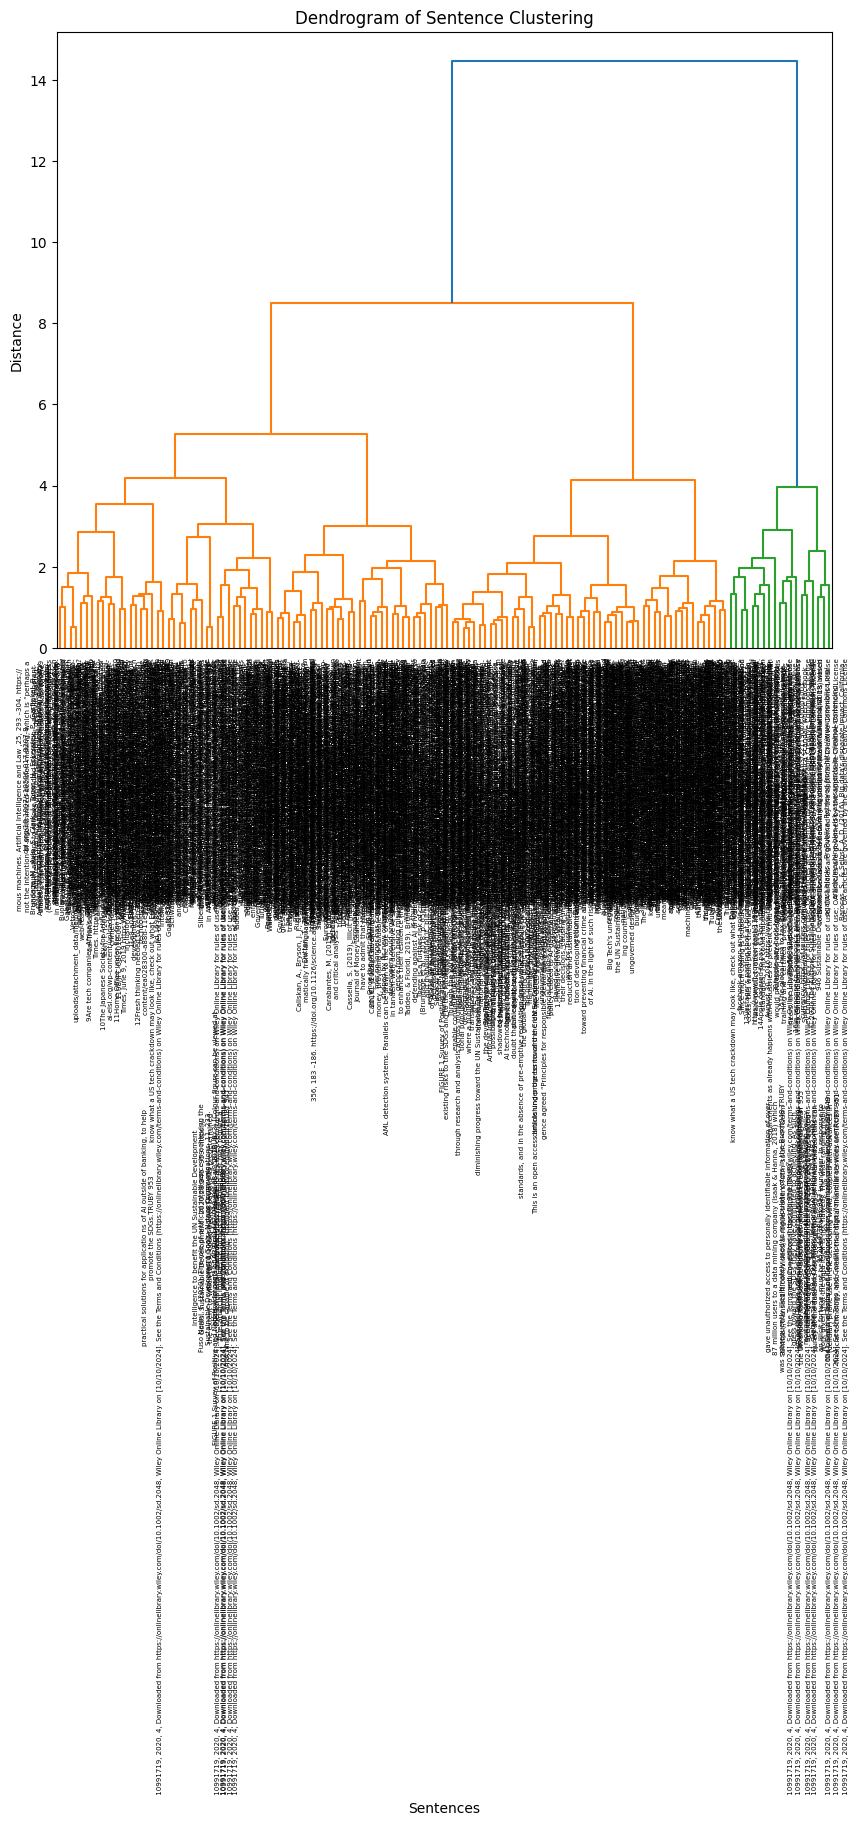

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sentence_transformers import SentenceTransformer

# Initialize the model and encode the corpus
embedder = SentenceTransformer("all-MiniLM-L6-v2")
corpus = sentences
corpus_embeddings = embedder.encode(corpus)

# Calculate similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(corpus_embeddings)

# Convert similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
linked = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, labels=corpus, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram of Sentence Clustering")
plt.xlabel("Sentences")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [14]:
aaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaa' is not defined

In [24]:
import os
import json
#from dotenv import load_dotenv
from supabase import create_client, Client
from faker import Faker
import faker_commerce


def add_entries_to_vendor_table(supabase, vendor_count):
    fake = Faker()
    foreign_key_list = []
    fake.add_provider(faker_commerce.Provider)
    main_list = []
    for i in range(vendor_count):
        value = {'vendor_name': fake.company(), 'total_employees': fake.random_int(40, 169),
                 'vendor_location': fake.country()}

        main_list.append(value)
    data = supabase.table('vendor2').insert(main_list).execute()
    data_json = json.loads(data.json())
    data_entries = data_json['data']
    for i in range(len(data_entries)):
        foreign_key_list.append(int(data_entries[i]['vendor_id']))
    return foreign_key_list


def add_entries_to_product_table(supabase, vendor_id):
    fake = Faker()
    fake.add_provider(faker_commerce.Provider)
    main_list = []
    iterator = fake.random_int(1, 15)
    for i in range(iterator):
        value = {'vendor_id': vendor_id, 'product_name': fake.ecommerce_name(),
                 'inventory_count': fake.random_int(1, 100), 'price': fake.random_int(45, 100)}
        main_list.append(value)
    data = supabase.table('Product').insert(main_list).execute()


def main():
    vendor_count = 10
    supabase: Client = create_client(key.SUPABASE_URL, key.SUPABASE_KEY)
    fk_list = add_entries_to_vendor_table(supabase, vendor_count)
    #for i in range(len(fk_list)):
    #    add_entries_to_product_table(supabase, fk_list[i])


main()


In [33]:
from supabase import create_client, Client

supabase: Client = create_client(key.SUPABASE_URL, key.SUPABASE_KEY)

data = supabase.rpc('hello_world').execute()
print("Hello World:", data)


data = supabase.rpc('get_vendors').gt('total_employees', 160).execute()
print("Vendors:", data)
vars(data)
data.data[0]

Hello World: data='hello world' count=None
Vendors: data=[{'vendor_id': 17, 'vendor_name': 'Mcbride-Daniels', 'vendor_location': 'Saint Martin', 'total_employees': 164, 'created_at': '2024-10-09T12:38:53.571458+00:00'}, {'vendor_id': 20, 'vendor_name': 'Cervantes Group', 'vendor_location': 'Turkey', 'total_employees': 166, 'created_at': '2024-10-09T12:38:53.571458+00:00'}, {'vendor_id': 24, 'vendor_name': 'Lopez LLC', 'vendor_location': 'France', 'total_employees': 163, 'created_at': '2024-10-09T12:49:41.538304+00:00'}, {'vendor_id': 25, 'vendor_name': 'Hart, Gonzalez and Martin', 'vendor_location': 'Andorra', 'total_employees': 163, 'created_at': '2024-10-09T12:49:41.538304+00:00'}, {'vendor_id': 52, 'vendor_name': 'Gilbert-Smith', 'vendor_location': 'Cocos (Keeling) Islands', 'total_employees': 167, 'created_at': '2024-10-09T12:57:38.891265+00:00'}, {'vendor_id': 77, 'vendor_name': 'Arias PLC', 'vendor_location': 'El Salvador', 'total_employees': 161, 'created_at': '2024-10-09T13:04:

{'vendor_id': 17,
 'vendor_name': 'Mcbride-Daniels',
 'vendor_location': 'Saint Martin',
 'total_employees': 164,
 'created_at': '2024-10-09T12:38:53.571458+00:00'}